# Assignment 6 - Timeseries

#### Author: Elaine R. Cazeta

## - Part 1:
Get the data from this [link](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv), which contains information about the Knock Airport weather, and plot:  

- The temperature.  
- The mean temperature each day.  
- The mean temperature for each month.  

In [1]:
# Import pandas library for data manipulation
import pandas as pd

# Import Seaborn and matplotlib libraries to create plots
import seaborn as sns

import matplotlib.pyplot as plt

# Import matplotlib to address the x-axis label
# in the monthly average temperature plots.
import matplotlib.dates as mdates

In [2]:
# Resources: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# Fixing the warning message while loading all columns: OpenAI

# Skip the first 23 rows as they have irrelevant data:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)

# Check the column names
print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


/tmp/ipykernel_41488/3282566223.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


In [3]:
# List of the columns that will be used
df = df[['date', 'temp', 'wdsp']]

# View first 3 rows
print(df.head(3))

                date  temp wdsp
0  10-apr-1996 14:00  11.5    0
1  31-jul-1996 08:00  11.5    0
2  31-jul-1996 09:00  11.6    0


In [4]:
# Check date type of column 'date'
print(df['date'].dtype)

object


In [5]:
# Convert column 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

/tmp/ipykernel_41488/889002016.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


datetime64[ns]


### - Plots:

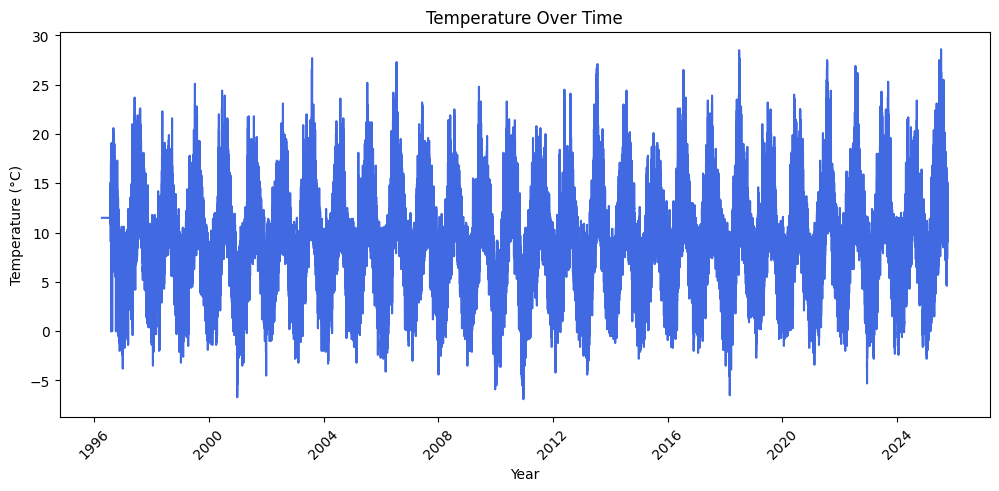

In [6]:
# Temperature plot

# Resources: 
# OpenAI
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# https://seaborn.pydata.org/tutorial/properties.html

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='date', y='temp', color='royalblue')
plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

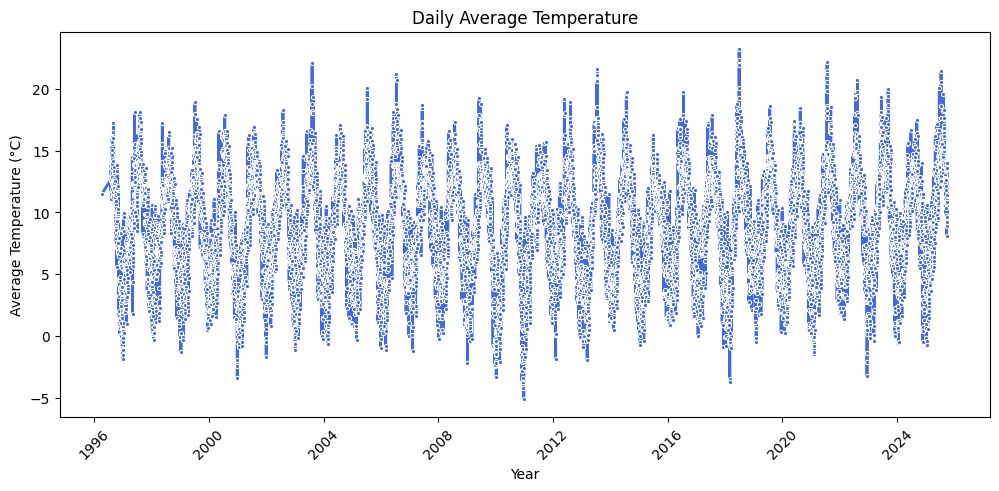

In [7]:
# Plot - Daily average temperature

# Group by day (ignore time) and calculate mean temperature
daily_mean = df.groupby(df['date'].dt.date)['temp'].mean().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_mean, x='date', y='temp', color='royalblue', linewidth=2, marker='.')
plt.title('Daily Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

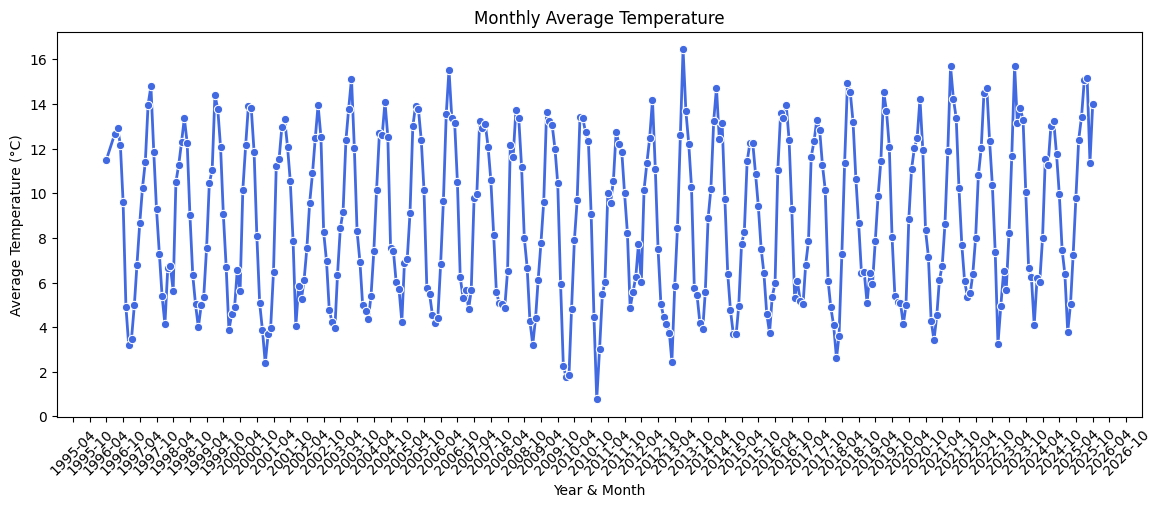

In [8]:
# Plot - Monthly Average Temperature

# Group by month and calculate mean temperature
monthly_mean = df.groupby(df['date'].dt.to_period('M'))['temp'].mean().reset_index()

# Convert Period to datetime (use start of month)
monthly_mean['date'] = monthly_mean['date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14,5))
sns.lineplot(data=monthly_mean, x='date', y='temp', color='royalblue', linewidth=2, marker='o')
plt.title('Monthly Average Temperature')
plt.xlabel('Year & Month')
plt.ylabel('Average Temperature (°C)')
# Show only every 6 months on x-axis for better visualization
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

## - Part 2:

Plot:
- The Windspeed (there is data missing from this column).  
- The rolling windspeed (say over 24 hours).  
- The max windspeed for each day.  
- The monthly mean of the daily max windspeeds.  

### - Plots:

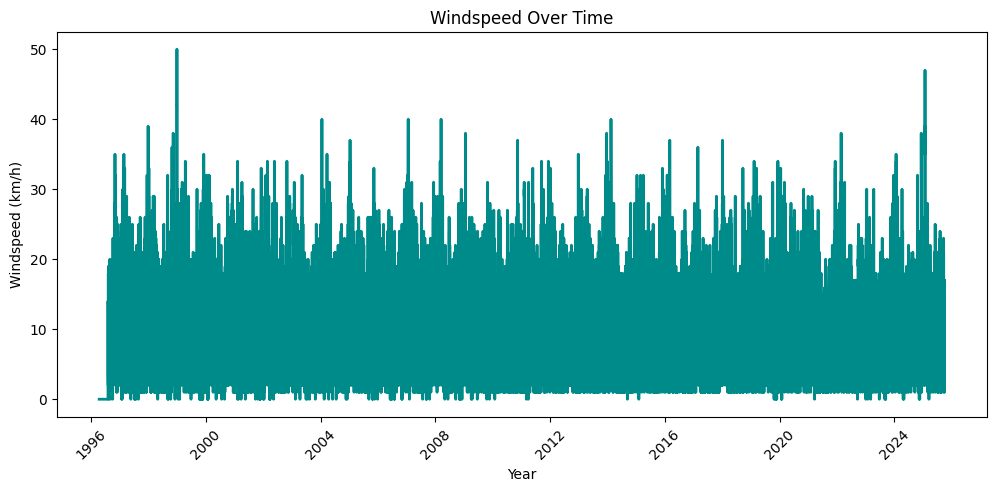

In [9]:
# Windspeed Plot

# Resources: 
# OpenAI

# Make a copy of date + wdsp
df_wdsp = df[['date', 'wdsp']].copy()

# Convert to numeric, invalid values become NaN
df_wdsp['wdsp'] = pd.to_numeric(df_wdsp['wdsp'], errors='coerce')

# Remove missing values
df_wdsp = df_wdsp.dropna()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=df_wdsp, x='date', y='wdsp', color='darkcyan', linewidth=2)
plt.title('Windspeed Over Time')
plt.xlabel('Year')
plt.ylabel('Windspeed (km/h)')
plt.xticks(rotation=45)
plt.show()



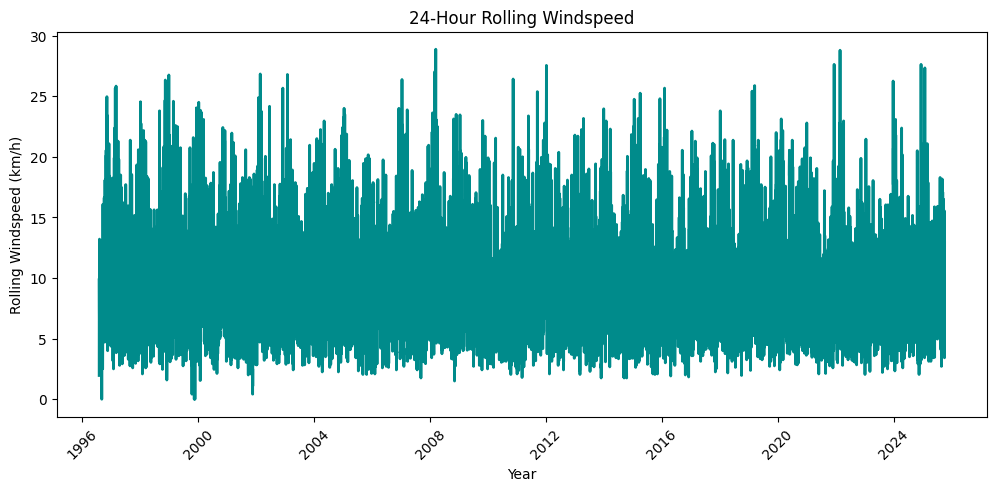

In [10]:
# Rolling Windspeed Plot

# Create a 24-hour rolling mean
df_wdsp['wdsp_rolling'] = df_wdsp['wdsp'].rolling(window=24).mean()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=df_wdsp, x='date', y='wdsp_rolling', color='darkcyan', linewidth=2)
plt.title('24-Hour Rolling Windspeed')
plt.xlabel('Year')
plt.ylabel('Rolling Windspeed (km/h)')
plt.xticks(rotation=45)
plt.show()

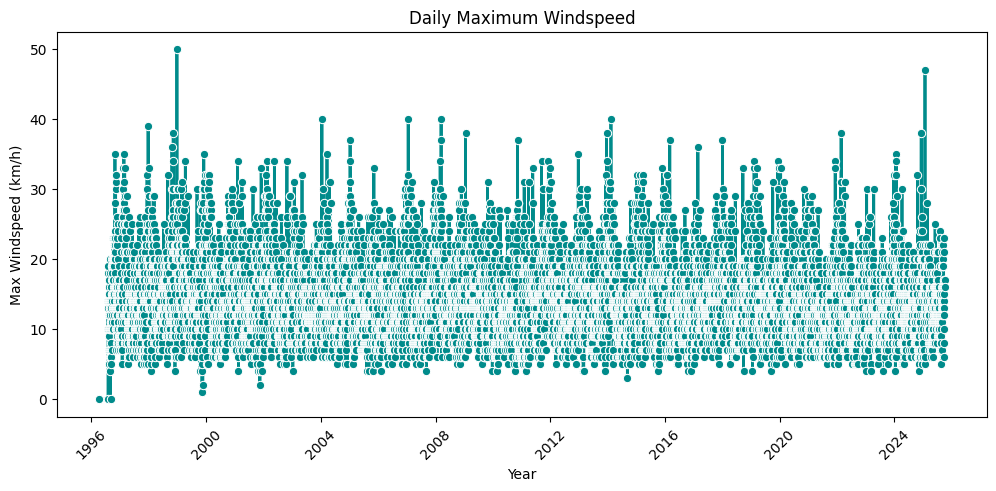

In [11]:
# Daily Max Windspeed Plot

# Make a copy of date + wdsp
df_wdsp = df[['date', 'wdsp']].copy()

# Convert to numeric, invalid entries become NaN
df_wdsp['wdsp'] = pd.to_numeric(df_wdsp['wdsp'], errors='coerce')

# Remove missing values
df_wdsp = df_wdsp.dropna()

# Calculate daily max
daily_max = df_wdsp.groupby(df_wdsp['date'].dt.date)['wdsp'].max().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_max, x='date', y='wdsp', color='darkcyan', marker='o', linewidth=2)
plt.title('Daily Maximum Windspeed')
plt.xlabel('Year')
plt.ylabel('Max Windspeed (km/h)')
plt.xticks(rotation=45)
plt.show()

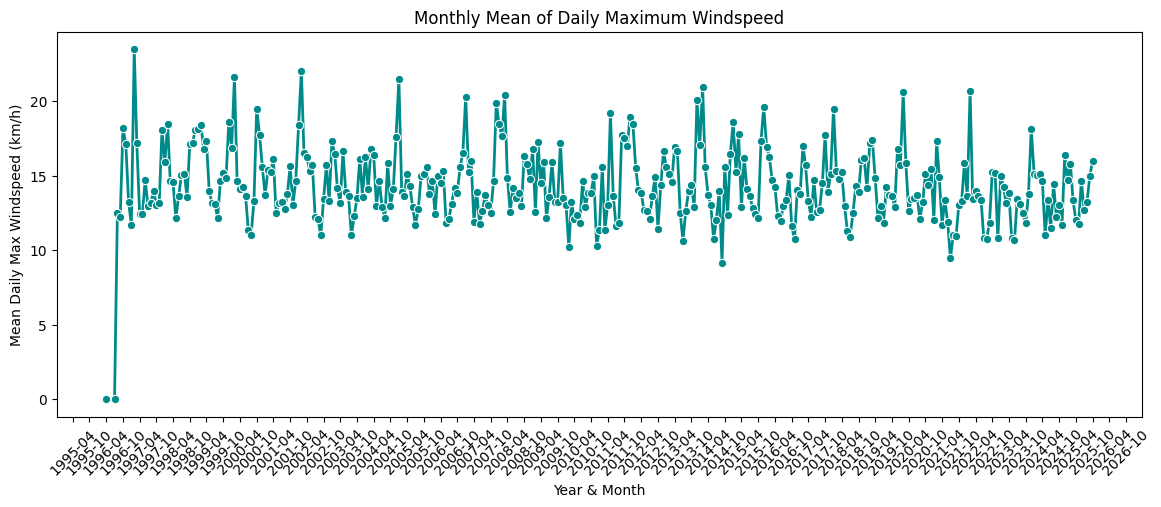

In [12]:
# Monthly Average of Daily Max Windspeed Plot

# Convert 'date' to datetime 
daily_max['date'] = pd.to_datetime(daily_max['date'])

# Monthly mean of daily max windspeed
monthly_max_mean = daily_max.groupby(daily_max['date'].dt.to_period('M'))['wdsp'].mean().reset_index()
monthly_max_mean['date'] = monthly_max_mean['date'].dt.to_timestamp()  # convert Period -> Timestamp

plt.figure(figsize=(14,5))
sns.lineplot(data=monthly_max_mean, x='date', y='wdsp', color='darkcyan', marker='o', linewidth=2)
plt.title('Monthly Mean of Daily Maximum Windspeed')
plt.xlabel('Year & Month')
plt.ylabel('Mean Daily Max Windspeed (km/h)')

# Show every 6 months on x-axis for better visualization
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

# End